*Made By [Adnan](https://linktr.ee/adnaaaen)*

# ***Exploratory Data Analysis***

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import os

plt.style.use("dark_background")
filterwarnings("ignore")

In [2]:
if not os.path.exists("../data/cleaned/cleaned.csv"):
    raise Exception("your need to download dataset, visit data/ folder in the root")
    
df = pd.read_csv("../data/cleaned/cleaned.csv", parse_dates=["datetime"])

In [3]:
numerical_variables = df.select_dtypes(np.number).drop(columns=["aqi"])
categorical_variables = df.select_dtypes("O")

### ***Target Varibale Distribution***

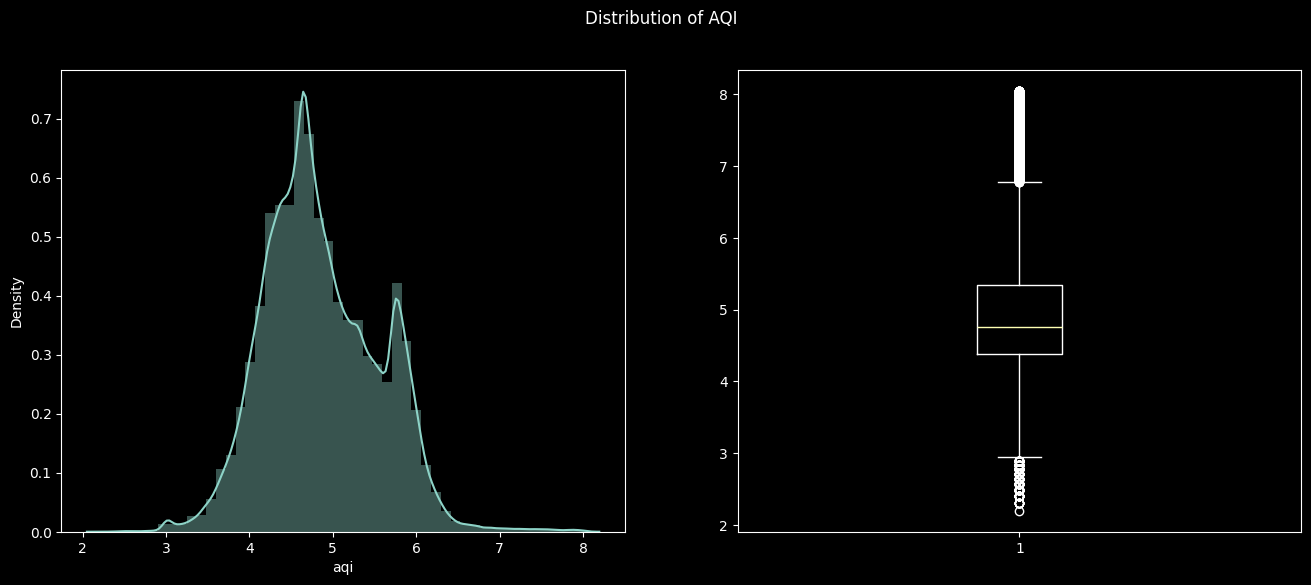

In [4]:
plt.figure(figsize=(16,6))
plt.suptitle("Distribution of AQI")
plt.subplot(1, 2, 1)
sns.distplot(df["aqi"])

plt.subplot(1, 2, 2)
plt.boxplot(df["aqi"])

plt.show()

## ***Uni-Variate Analysis***

### ***Numerical Varibale Analysis***

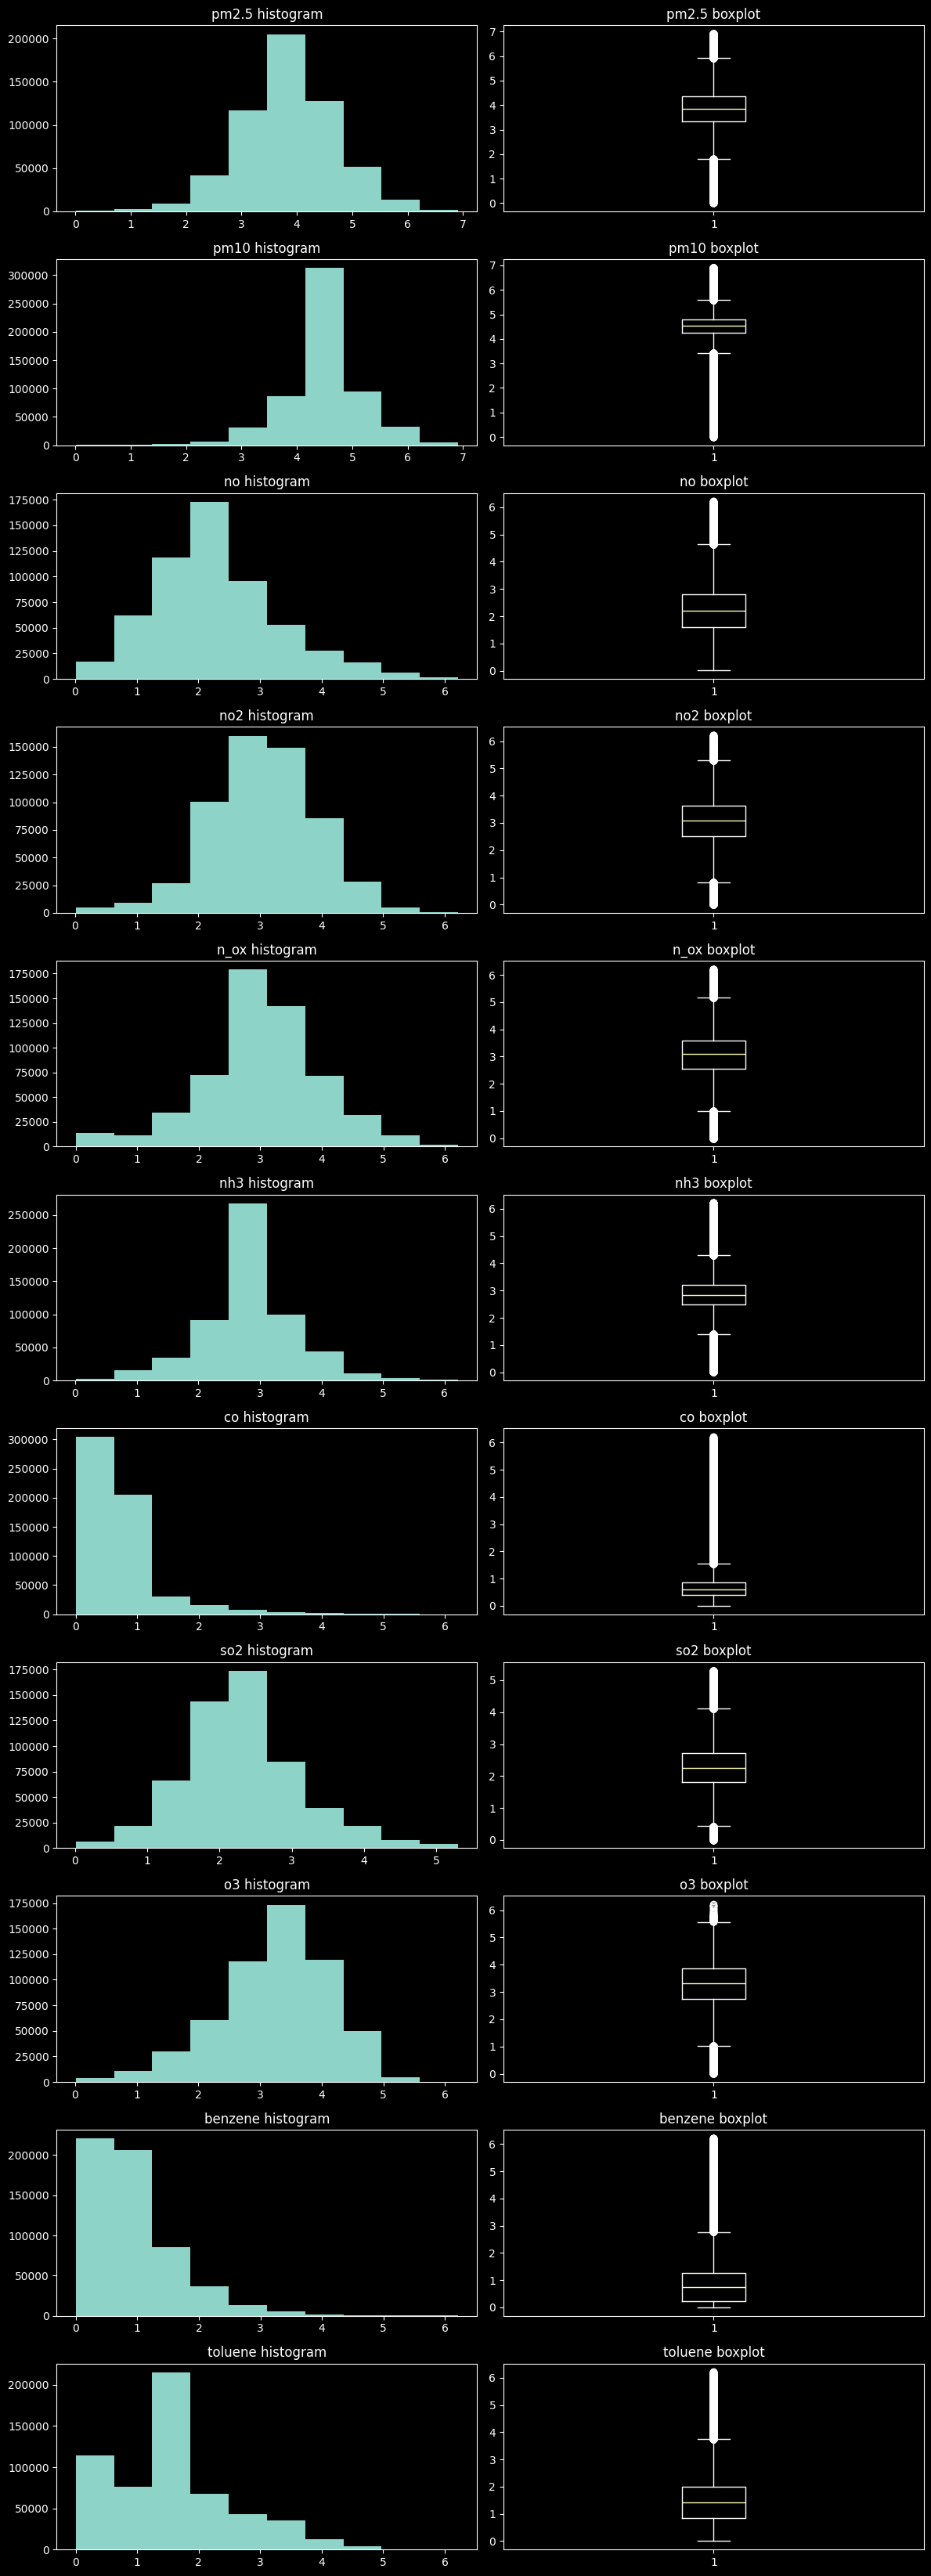

In [5]:
_, ax = plt.subplots(len(numerical_variables.columns), 2, figsize=(12, 3*len(numerical_variables.columns)))

for i, column in enumerate(numerical_variables.columns):
    ax[i, 0].set_title(f"{column} histogram")
    ax[i, 0].hist(df[column])
    
    ax[i, 1].set_title(f"{column} boxplot")
    ax[i, 1].boxplot(df[column])
plt.tight_layout()
plt.show()

### ***Categorical Variable Analysis***

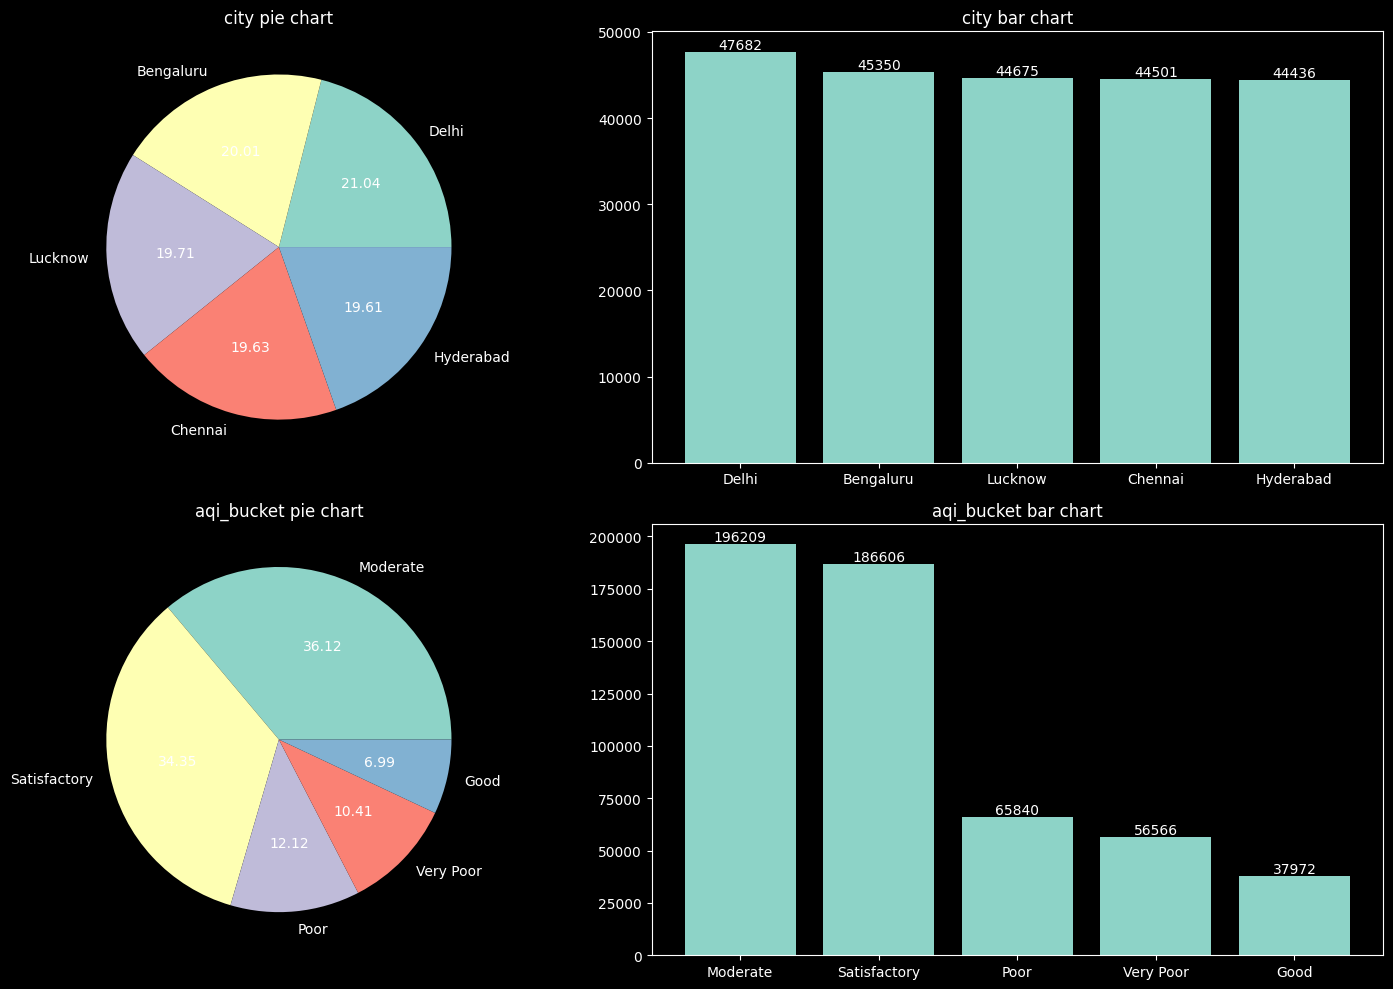

In [6]:
_, ax = plt.subplots(len(categorical_variables.columns), 2, figsize=(15, 5*len(categorical_variables.columns)))

for i, column in enumerate(categorical_variables.columns):
    ax[i, 0].set_title(f"{column} pie chart")
    ax[i, 0].pie(
        x=df[column].value_counts().nlargest(n=5).values, labels=df[column].value_counts().nlargest(n=5).index, autopct="%.2f"
    )
    
    ax[i, 1].set_title(f"{column} bar chart")
    lab = ax[i, 1].bar(
        height=df[column].value_counts().nlargest(n=5).values, x=df[column].value_counts().nlargest(n=5).index
    )
    ax[i, 1].bar_label(lab)

plt.tight_layout()
plt.show()

## ***Bi-Variate Analysis***

### ***Numerical Varibale Analysis***

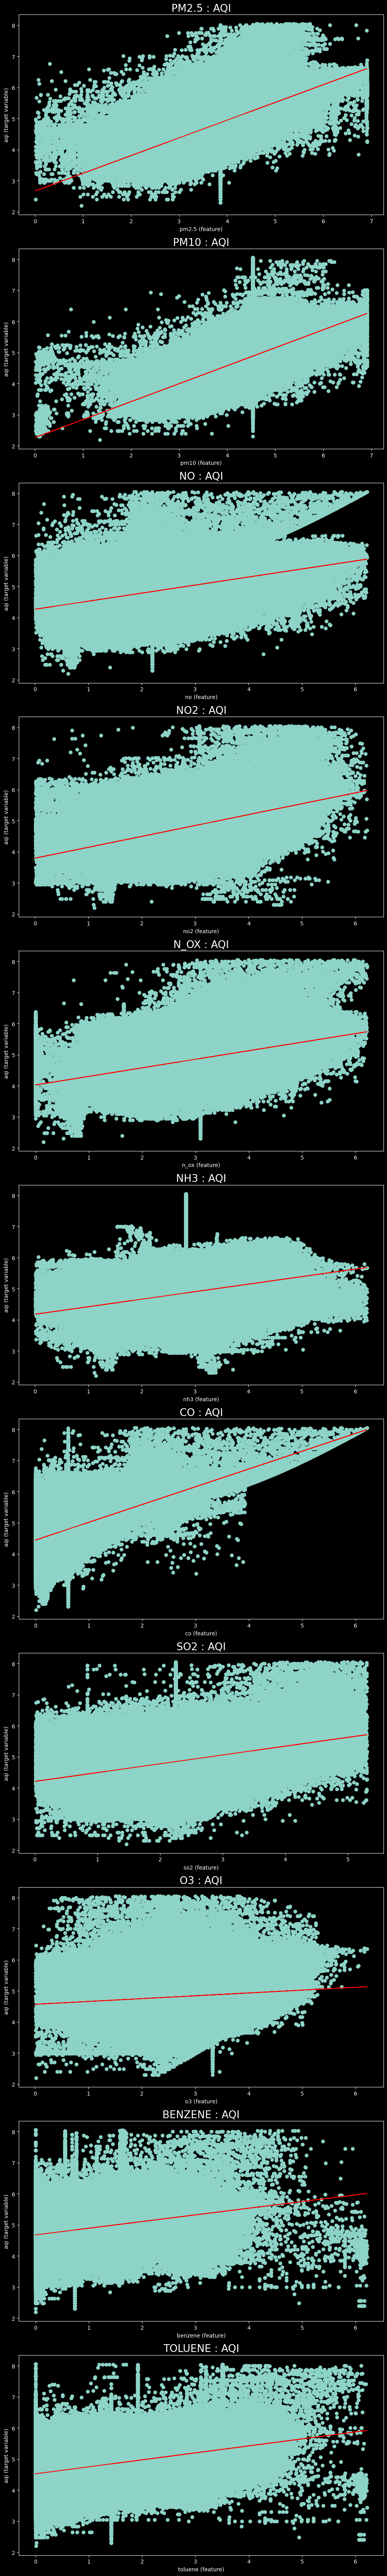

In [7]:
_, ax = plt.subplots(len(numerical_variables.columns), 1, figsize=(10, 6 * len(numerical_variables.columns)))

for i, column in enumerate(numerical_variables.columns):
    ax[i].scatter(x=df[column], y=df["aqi"])
    ax[i].set_title(f"{column.upper()} : AQI", fontsize=19)
    
    slope,  intercept = np.polyfit(df[column], df["aqi"], 1)
    line = slope * df[column] + intercept
    
    ax[i].plot(df[column], line, color="red")

    ax[i].set_xlabel(f"{column} (feature)")
    ax[i].set_ylabel("aqi (target variable)")
    
plt.tight_layout()
plt.show()

- **Almost all feature have positive correalation with target variable**

### ***Categorical Varibale Analysis***

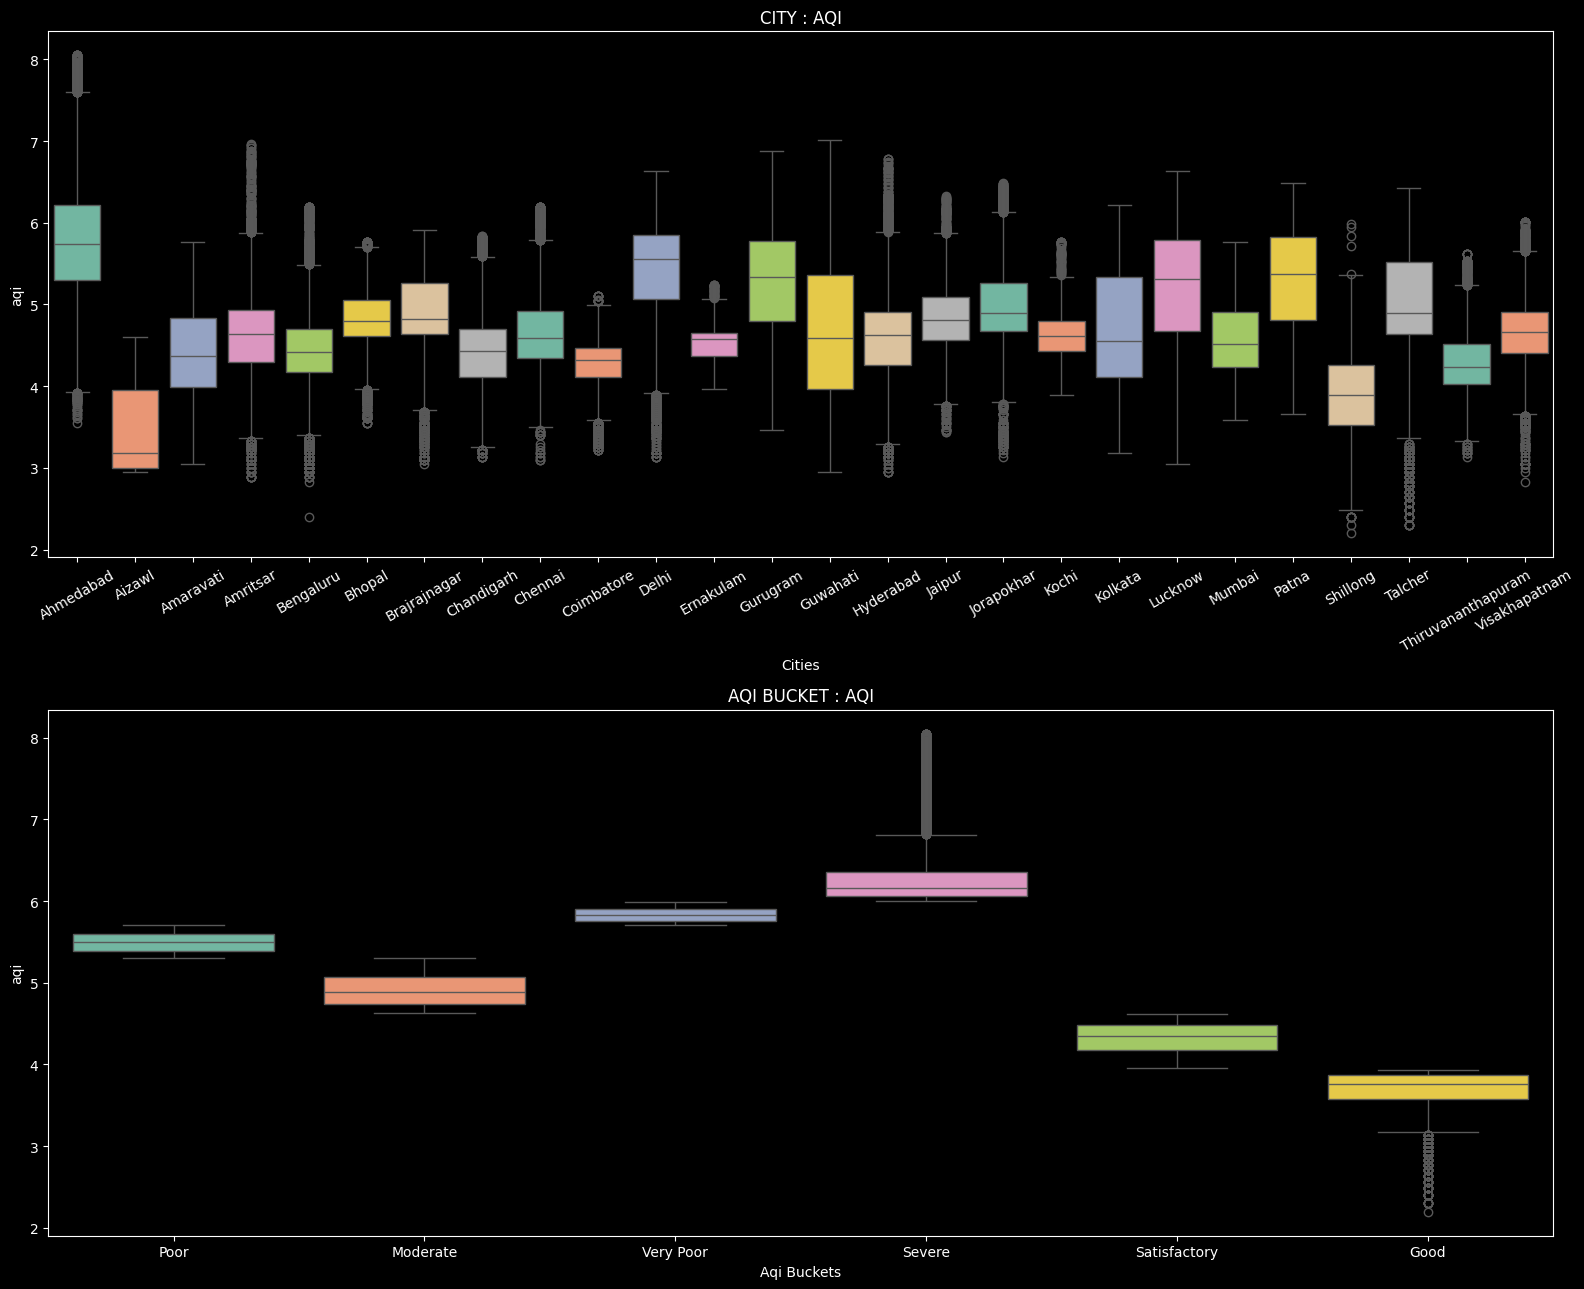

In [8]:
plt.figure(figsize=(16, 13))
plt.subplot(2,1,1)
sns.boxplot(x=df["city"], y=df["aqi"], palette="Set2")
plt.title("CITY : AQI")
plt.xlabel("Cities")
plt.xticks(rotation=30)

plt.subplot(2,1,2)
sns.boxplot(x=df["aqi_bucket"], y=df["aqi"], palette="Set2")
plt.title("AQI BUCKET : AQI")
plt.xlabel("Aqi Buckets")

plt.tight_layout()
plt.show()

## ***Multi-Variate Analysis***

### ***Correlation Analysis***

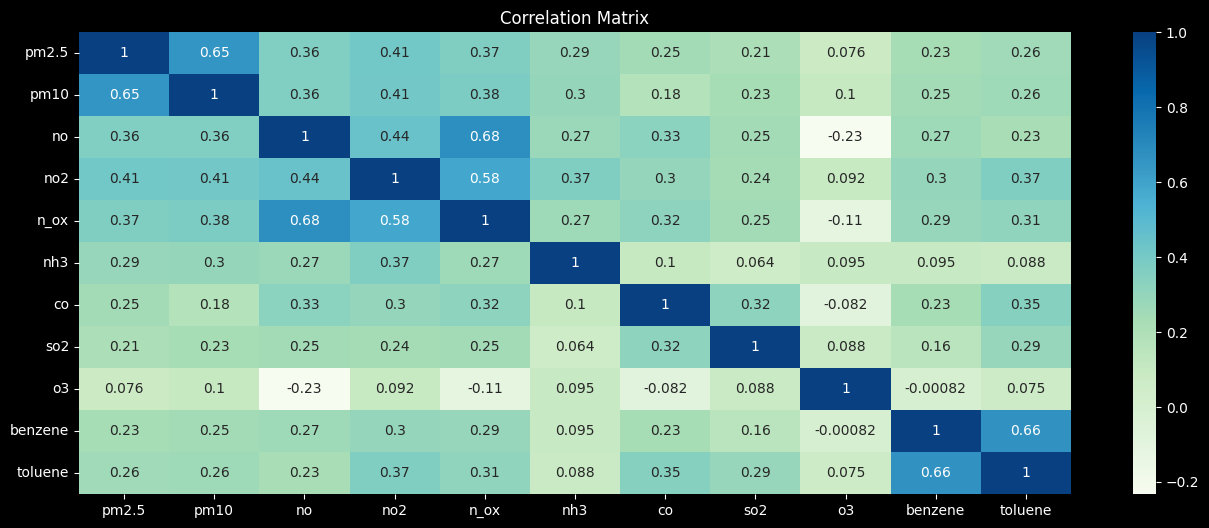

In [10]:
plt.figure(figsize=(16,6))
sns.color_palette("rocket", as_cmap=True)
corr = numerical_variables.corr()
sns.heatmap(corr, annot=True, cmap="GnBu")
plt.title("Correlation Matrix")
plt.show()

### **EDA REPORT**

- All Numeric variable follows normal distribution.
- Most of all feature are keep average correlation with target.


**High Correlation with:**
|     |          | |
|--------|-----------------|--------------|
|**pm10**    | **pm2.5**           | **0.65**         |
|**no**      | **n_ox**            | **0.68**         |
|**no2**     | **n_ox**            | **0.58**         |
|**benzene** | **tolune**          | **0.66**         |

***Next:* Preprocessing**